In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
dog_classes = os.listdir('./Images/')

In [5]:
breeds = [breed.split('-',1)[1] for breed in dog_classes]
breedsNumber = [breed.split('-',1)[0] for breed in dog_classes]

In [4]:
# Create folder train, valid, test and put pictures

# for i in range(0, len(breeds)):
#     path, dirs, files = next(os.walk('./Images/' + str(breedsNumber[i]) + "-" + str(breeds[i])))
#     file_count = len(files)
    
#     train_percentage = round((70 * file_count) / 100)
#     valid_percentage = round((20 * file_count) / 100)
#     test_percentage  = round((10 * file_count) / 100)
    
#     total_percentage = train_percentage + valid_percentage + test_percentage
    
#     if total_percentage > file_count:
#         test_percentage = total_percentage - file_count
    
#     if os.path.isdir('./data/train/' + str(breedsNumber[i]) + "-" + str(breeds[i])) is False:
#         os.makedirs('./data/train/' + str(breedsNumber[i]) + "-" + str(breeds[i]))
#         os.makedirs('./data/valid/' + str(breedsNumber[i]) + "-" + str(breeds[i]))
#         os.makedirs('./data/test/' + str(breedsNumber[i]) + "-" + str(breeds[i]))
        
#         for j in random.sample(glob.glob('./Images/' + str(breedsNumber[i]) + "-" + str(breeds[i]) + '/*'), train_percentage):
#             shutil.move(j, './data/train/' + str(breedsNumber[i]) + "-" + str(breeds[i] + "/"))
#         for j in random.sample(glob.glob('./Images/' + str(breedsNumber[i]) + "-" + str(breeds[i]) + '/*'), valid_percentage):
#             shutil.move(j, './data/valid/' + str(breedsNumber[i]) + "-" + str(breeds[i] + "/"))
#         for j in random.sample(glob.glob('./Images/' + str(breedsNumber[i]) + "-" + str(breeds[i]) + '/*'), test_percentage):
#             shutil.move(j, './data/test/' + str(breedsNumber[i]) + "-" + str(breeds[i] + "/"))

In [6]:
train_path = './data/train/'
valid_path = './data/valid/'
test_path  = './data/test/'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=dog_classes, batch_size=20)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=dog_classes, batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=dog_classes, batch_size=20, shuffle=False)

Found 4924 images belonging to 120 classes.
Found 1397 images belonging to 120 classes.
Found 676 images belonging to 120 classes.


In [7]:
imgs, labels = next(train_batches)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

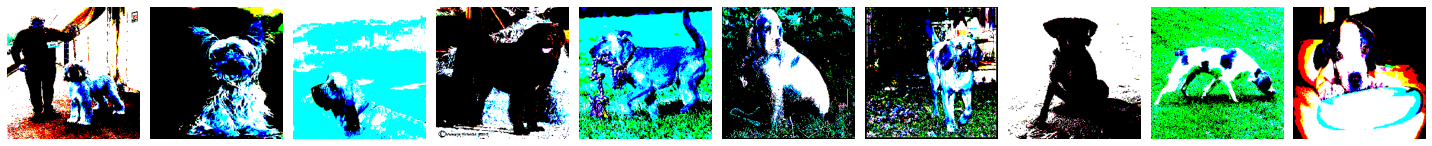

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
plotImages(imgs)
print(labels)

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=120, activation='softmax')
])

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x = train_batches,
    steps_per_epoch = len(train_batches),
    validation_data = valid_batches,
    validation_steps = len(valid_batches),
    epochs = 20)

Epoch 1/20


ImportError: Could not import PIL.Image. The use of `load_img` requires PIL.

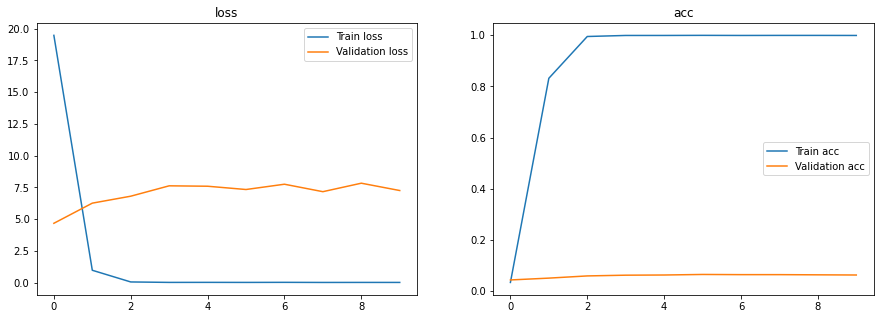

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[1].set_title('acc')
ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
ax[0].legend()
ax[1].legend()